C:\Users\GlebP\AppData\Local\Temp\ipykernel_4436\828682527.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('BrBG')  # Brown-Blue-Green colormap
MovieWriter ffmpeg unavailable; using Pillow instead.


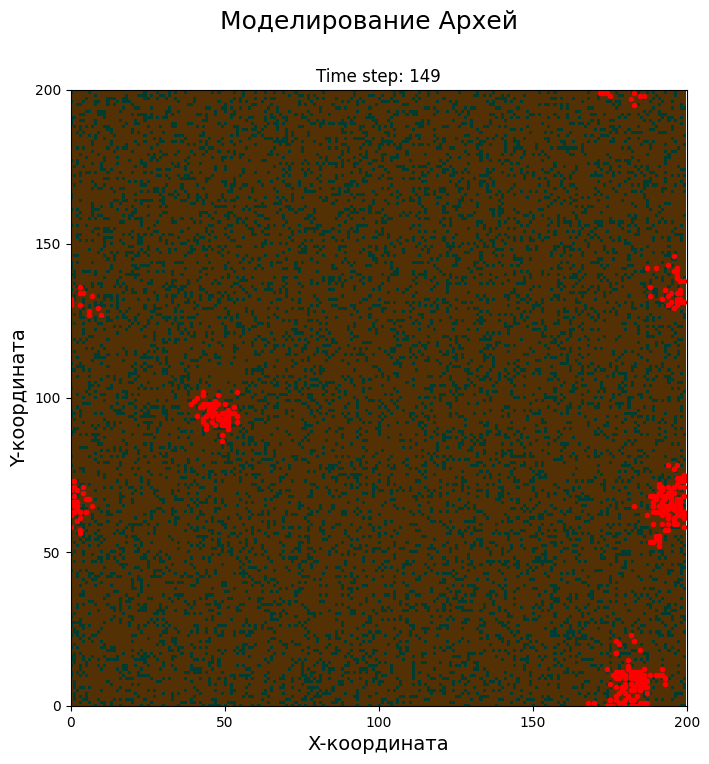

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Параметры модели
grid_size = 200  # Размер сетки
initial_archea_count = 4  # Начальное количество архей
oil_density = 0.2  # Плотность нефти в сетке (0-1)
archea_movement_probability = 0.5  # Вероятность движения архей
archea_reproduction_probability = 0.03  # Вероятность размножения архей
oil_consumption_rate = 0.5  # Скорость потребления нефти археями
consumption_radius = 8  # Радиус потребления нефти вокруг археи (теперь 1 клетка)
starvation_frames = 20  # Количество кадров без нефти, после которых архей погибает

# Создание сетки
grid = np.random.rand(grid_size, grid_size) < oil_density  # Создание сетки с нефтью

# Создание начальной популяции архей
archea_positions = np.array(
    [(random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)) for _ in range(initial_archea_count)]
)

# Создание фигуры и осей для анимации
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([])  # Убираем метки на оси X
ax.set_yticks([])  # Убираем метки на оси Y

# Создаем цветовую палитру
cmap = plt.cm.get_cmap('BrBG')  # Brown-Blue-Green colormap
cmap.set_bad(color='saddlebrown')  # Устанавливаем коричневый цвет для отсутствия нефти

# Отображаем сетку с нефтью (черный) и пустые клетки (коричневый)
oil_plot = ax.imshow(grid, cmap=cmap, interpolation='nearest')
archea_plot, = ax.plot(archea_positions[:, 0], archea_positions[:, 1], 'ro', markersize=3)  # Уменьшаем размер маркера архей

# Добавляем счетчики голодания для каждого архея
starvation_counters = np.zeros(len(archea_positions), dtype=int)

# Функция для обновления кадра анимации
def animate(frame):
    global archea_positions, grid, starvation_counters
    # Движение архей
    for i, (x, y) in enumerate(archea_positions):
        if random.random() < archea_movement_probability:
            # Выбор случайного направления
            direction = random.randint(0, 3)
            if direction == 0:
                x = (x + 1) % grid_size
            elif direction == 1:
                x = (x - 1) % grid_size
            elif direction == 2:
                y = (y + 1) % grid_size
            else:
                y = (y - 1) % grid_size
            archea_positions[i] = (x, y)

    # Размножение архей
    new_archea_positions = []
    for i, (x, y) in enumerate(archea_positions):
        if random.random() < archea_reproduction_probability:
            # Выбор случайного направления для нового архея
            direction = random.randint(0, 3)
            if direction == 0:
                new_archea_positions.append(((x + 1) % grid_size, y))
            elif direction == 1:
                new_archea_positions.append(((x - 1) % grid_size, y))
            elif direction == 2:
                new_archea_positions.append((x, (y + 1) % grid_size))
            else:
                new_archea_positions.append((x, (y - 1) % grid_size))
    # Преобразование в 2D массив NumPy
    new_archea_positions = np.array(new_archea_positions)

    # Объединение архей с помощью np.vstack
    if new_archea_positions.size > 0:  # Проверка, что new_archea_positions не пуст
        archea_positions = np.vstack((archea_positions, new_archea_positions))
        starvation_counters = np.append(starvation_counters, np.zeros(len(new_archea_positions), dtype=int))

    # Потребление нефти вокруг архей
    for i in range(len(archea_positions)):  # Перебираем архей по индексу
        x, y = archea_positions[i]
        # Проверяем, есть ли нефть в радиусе вокруг археи
        found_oil = False
        for dx in range(-consumption_radius, consumption_radius + 1):
            for dy in range(- consumption_radius, consumption_radius + 1):
                nx = x + dx
                ny = y + dy
                if 0 <= nx < grid_size and 0 <= ny < grid_size and grid[nx, ny]:  # Проверка границ
                    grid[ny, nx] = False
                    found_oil = True
                    break  # Выходим из цикла, если нефть съедена
            if found_oil:
                break  # Выходим из внешнего цикла, если нефть съедена

        if found_oil:
            starvation_counters[i] = 0  # Сбрасываем счетчик голодания, если архей нашел нефть
        else:
            starvation_counters[i] += 1  # Увеличиваем счетчик голодания, если архей не нашел нефть

    # Удаляем голодающих архей
    dead_archea_indices = np.where(starvation_counters >= starvation_frames)[0]
    if dead_archea_indices.size > 0:
        archea_positions = np.delete(archea_positions, dead_archea_indices, axis=0)
        starvation_counters = np.delete(starvation_counters, dead_archea_indices)

    # Обновление изображения
    oil_plot.set_data(grid)
    archea_plot.set_data(archea_positions[:, 0], archea_positions[:, 1])
    ax.set_title(f"Time step: {frame}")
    ax.set_xlabel("X-координата", fontsize=14)  # Добавляем подпись оси X
    ax.set_ylabel("Y-координата", fontsize=14)  # Добавляем подпись оси Y
    ax.set_xlim(0, grid_size)  # Устанавливаем пределы оси X
    ax.set_ylim(0, grid_size)  # Устанавливаем пределы оси Y
    ax.set_xticks(np.arange(0, grid_size + 1, 50))  # Добавляем метки по оси X
    ax.set_yticks(np.arange(0, grid_size + 1, 50))  # Добавляем метки по оси Y
    fig.suptitle("Моделирование Архей", fontsize=18)  # Добавляем название графика
    ax.set_aspect('equal')  # Делаем клетки квадратными
    return oil_plot, archea_plot

# Создание анимации
ani = animation.FuncAnimation(fig, animate, frames=150, interval=300, blit=True)
ani.save('oil.gif')
plt.show()